# Производная. Градиент. Градиентный спуск.

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

## Производная

### Определение

![source: Wikipedia](https://upload.wikimedia.org/wikipedia/commons/d/d2/Tangent-calculus.svg)

Угол наклона секущей можно найти как $$\frac{\Delta y}{\Delta x}=\frac{y_2-y_1}{x_2-x_1}=\frac{f(x+\Delta x)-f(x)}{\Delta x}$$

In [2]:
@interact(lg_z=(-0.5,4.0,0.1))
def f(lg_z=1.0):
    z=10**lg_z
    x_min=1.5-6/z
    x_max=1.5+6/z
    l_min=1.5-4/z
    l_max=1.5+4/z
    xstep=(x_max-x_min)/100
    lstep=(l_max-l_min)/100
    x=np.arange(x_min,x_max,xstep)
    plt.plot(x,np.sin(x),'-b')     
    plt.plot((l_min,l_max),(np.sin(l_min),np.sin(l_max)),'-r')
    plt.plot((l_min,l_max),(np.sin(l_min),np.sin(l_min)),'-r')
    plt.plot((l_max,l_max),(np.sin(l_min),np.sin(l_max)),'-r')
    yax = plt.ylim()    
    plt.text(l_max+0.1/z,(np.sin(l_min)+np.sin(l_max))/2,"$\Delta y$")
    plt.text((l_min+l_max)/2,np.sin(l_min)-(yax[1]-yax[0])/20,"$\Delta x$")
    plt.show()
    print('slope =',(np.sin(l_max)-np.sin(l_min))/(l_max-l_min))

interactive(children=(FloatSlider(value=1.0, description='lg_z', max=4.0, min=-0.5), Output()), _dom_classes=('widget-interact',))

Как видно из демо, если увеличивать картинку, т.е. рассматривать все меньший промежуток по оси абсцисс, коэффициент наклона секущей стремится к некоторому определнному числу, равному коэффициенту наклона касательной в точке $x$. Это число называется **производной** функции $f(x)$ в точке $x$ и записывается как $f'(x)$ или $\frac{d}{dx}(f(x))$.

### Производные элементарных функций

![](https://matematikalegko.ru/wp-content/uploads/2012/11/166.gif)

### Правила вычисления производных

*Правила вычисления производных:*
1. Если $f(x)$ есть константа, то ее производная равняется 0: $$(C)'=0$$
2. Производная суммы функций есть сумма производных функций: $$(f(x)+g(x))'=f'(x)+g'(x)$$
4. Производная произведения функций: $$(f(x)g(x))'=f'(x)g(x)+f(x)g'(x)$$
5. Производная отношения функций: $$\left(\frac{f(x)}{g(x)}\right)'=\frac{f'(x)g(x)-f(x)g'(x)}{g^2(x)}$$
6. Производная сложной функции: $$(f(g(x)))'=f'(g(x))g'(x)$$
По-другому эту формулу записывают в виде:
$$\frac{d}{dx}(f(g(x)))=\frac{df}{dg}\frac{dg}{dx}$$

## Функции многих переменных. Частные производные. Градиент

### Функция многих переменных

$$F(x_{1}, x_{2}, \ldots, x_{n})$$

### Частные производные

Давайте зафиксируем все переменные $x_{i}$, кроме $x_{j}$. Тогда мы будем оперировать уже не с функцией многих переменных $F(x_{1}, x_{2}, \ldots, x_{n})$, а с функцией одной переменной $\Phi(x_{j})$. У нее мы можем как обычно взять производную. Эта производная и называется частной производной функции многих переменных $F(x_{1}, x_{2}, \ldots, x_{n})$ по переменной $x_{j}$. Обозначается $$\frac{\partial F(x_{1}, x_{2}, \ldots, x_{n})}{\partial x_{j}}$$

### Градиент

**Градиент** - вектор, компоненты которого есть частные производные функции многих переменных по всем ее переменным.

Градиент показывает направление наибольшого возрастания функции.

## Градиентный спуск

**Градиентный спуск** - итеративный алгоритм, который позволяет найти (локальный) минимум функции.
![Wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/512px-Gradient_descent.svg.png)

**Основная идея метода:** Приблизиться к минимуму можно, если идти в направлении антиградиента.

Математически эта идея записывается следующим образом $$x'_i=x_i-\eta\frac{\partial f}{\partial x_i}, \forall i \in \overline{1,n}$$

In [3]:
# Стандартная реализация
def gradient_descent(f, df, starting_point, c = None, iter_max = None):
    """
      in:
        f    - function; you want to find minimum of it
        df   - function's gradient
        starting_point      - you need to provide starting point;
                              gradient descent need starting point
                              in order to start its recursive algorithm
        c (optional)        - learning rate;
                              default is c = 0.001
        iter_max (optional) - if you algorithm doesn't stop by the precision,
                              then it will be terminated by this parameter
                              default is iter_max = 1e7
      out:
        y    - point of local minimum
        f(y) - value of the function in that point
    """
    iter_num = 0
    if c is None:
        c = 0.001
    if iter_max is None:
        iter_max = 1e7
    y = starting_point - c * df(starting_point)
    while iter_num < iter_max and abs(y - starting_point) > 1e-7:
        ++iter_num
        starting_point, y = starting_point - c * df(starting_point), starting_point
    return y, f(y)

In [4]:
f = lambda x: -5 * x ** 2 + 4 * x + 4
df = lambda x: -10 * x + 4

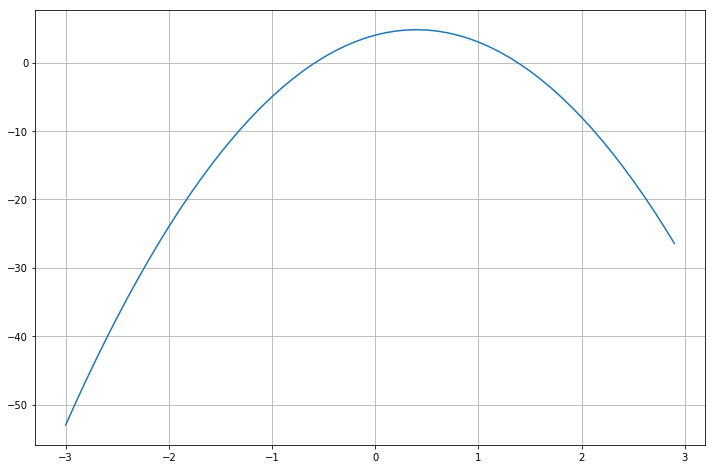

In [5]:
plt.figure(figsize=(12,8))

grid = np.arange(-3, 3, 0.1)

plt.plot(grid, f(grid))

plt.grid(ls='-')
plt.show()

In [6]:
gradient_descent(f, df, 0)

(-inf, -inf)

In [7]:
f = lambda x: 5 * x ** 2 + 4 * x + 4
df = lambda x: 10 * x + 4

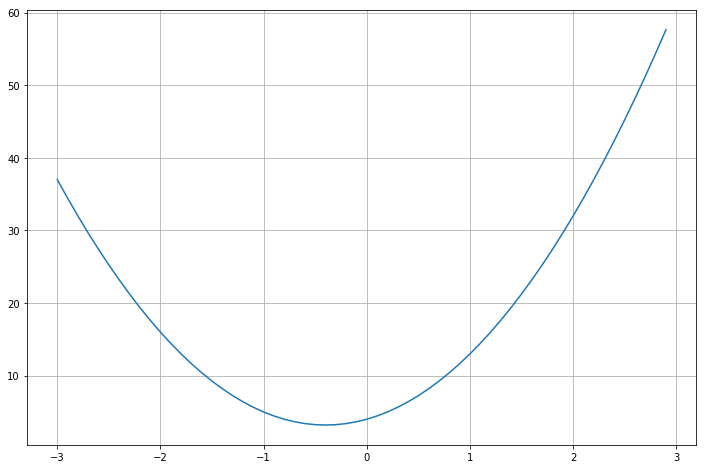

In [8]:
plt.figure(figsize=(12,8))

grid = np.arange(-3, 3, 0.1)

plt.plot(grid, f(grid))

plt.grid(ls='-')
plt.show()

In [9]:
gradient_descent(f, df, 0)

(-0.3999900644870959, 3.200000000493572)

In [10]:
f = lambda x: 5 * x ** 3 + 4 * x ** 2 - 17 * x - 13
df = lambda x: 15 * x ** 2 + 8 * x - 17

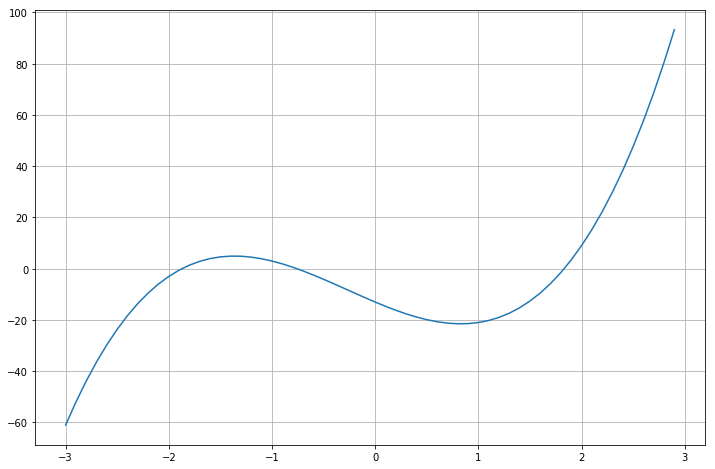

In [11]:
plt.figure(figsize=(12,8))

grid = np.arange(-3, 3, 0.1)

plt.plot(grid, f(grid))

plt.grid(ls='-')
plt.show()

In [12]:
gradient_descent(f, df, -1.3)

(0.8308022226676122, -21.495475669737417)

In [13]:
f = lambda x: x ** 6 - 3 * x ** 5 - 4 * x ** 4 + 5 * x ** 3
df = lambda x: 6 * x ** 5 - 15 * x ** 4 - 16 * x ** 3 + 15 * x ** 2

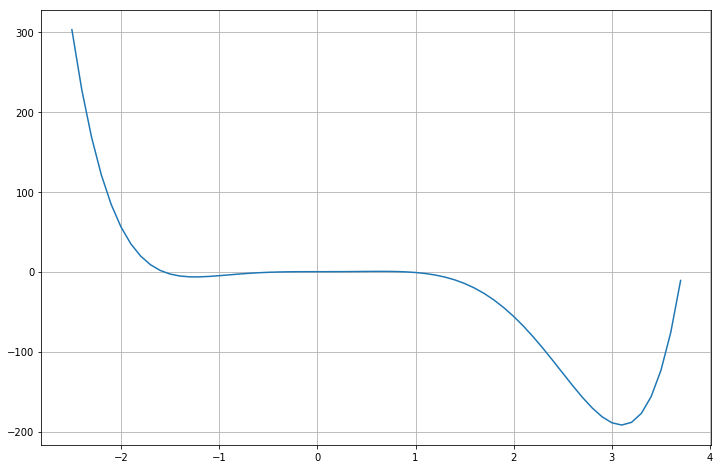

In [14]:
plt.figure(figsize=(12,8))

grid = np.arange(-2.5, 3.75, 0.1)

plt.plot(grid, f(grid))

plt.grid(ls='-')
plt.show()

In [17]:
gradient_descent(f, df, 1, c = 0.001)

(3.100062460620016, -191.82425020160863)

In [16]:
# Не самая удачная реализация
# Так писать НЕ надо
def gradient_descent(f, df, starting_point, c = None):
    if c is None:
        c = 0.05
    y = starting_point - c * df(starting_point)
    if abs(y - starting_point) > 1e-7:
        return gradient_descent(f, df, y, c)
    else:
        return y, f(y)